In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Load the HR Sample Data
file_path = 'HR Sample Data.xlsx'  # Update the path as per your file location
hr_data = pd.read_excel(file_path)

# Convert columns to appropriate types
hr_data['Interview Date'] = pd.to_datetime(hr_data['Interview date'], errors='coerce')
hr_data['Joining Date'] = pd.to_datetime(hr_data['Joining Date'], errors='coerce')

# Calculate the Time to Hire
hr_data['Time to Hire'] = (hr_data['Joining Date'] - hr_data['Interview Date']).dt.days

# Calculate Total Candidates, Avg Time to Hire, and Offer Conversion Rate
total_candidates = len(hr_data)
avg_time_to_hire = hr_data['Time to Hire'].mean()
interviewed_candidates = hr_data[hr_data['Status'] == 'Interview']
offered_candidates = hr_data[hr_data['Status'] == 'Offer']
offer_conversion_rate = len(offered_candidates) / len(interviewed_candidates) if len(interviewed_candidates) > 0 else 0


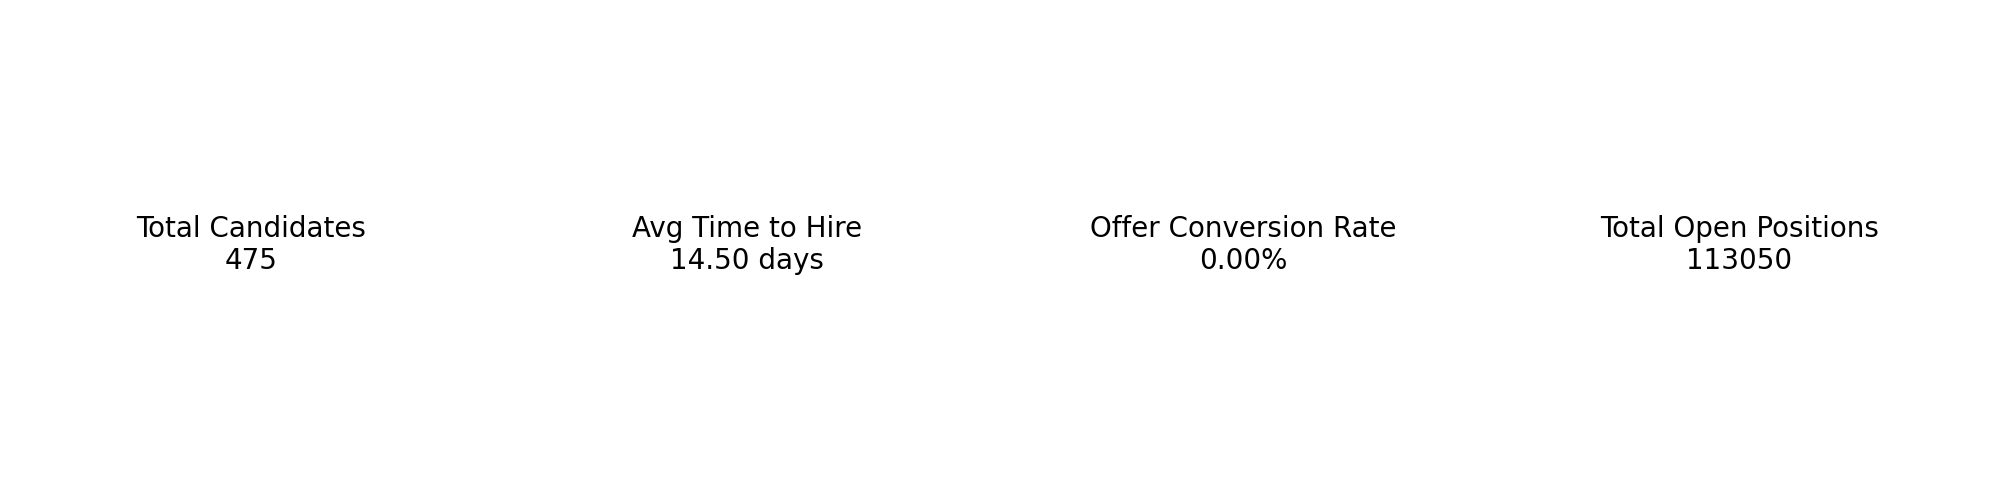

In [2]:
# Set up the figure and axes for the KPI Cards
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Total Candidates Card
ax[0].text(0.5, 0.5, f'Total Candidates\n{total_candidates}', fontsize=20, ha='center', va='center')
ax[0].axis('off')

# Average Time to Hire Card
ax[1].text(0.5, 0.5, f'Avg Time to Hire\n{avg_time_to_hire:.2f} days', fontsize=20, ha='center', va='center')
ax[1].axis('off')

# Offer Conversion Rate Card
ax[2].text(0.5, 0.5, f'Offer Conversion Rate\n{offer_conversion_rate*100:.2f}%', fontsize=20, ha='center', va='center')
ax[2].axis('off')

# Open Positions Card (Sum of Open Positions)
open_positions = hr_data['Open Positions'].sum()
ax[3].text(0.5, 0.5, f'Total Open Positions\n{open_positions}', fontsize=20, ha='center', va='center')
ax[3].axis('off')

plt.tight_layout()
plt.show()


C:\Users\atul\AppData\Local\Temp\ipykernel_10820\2853132735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')


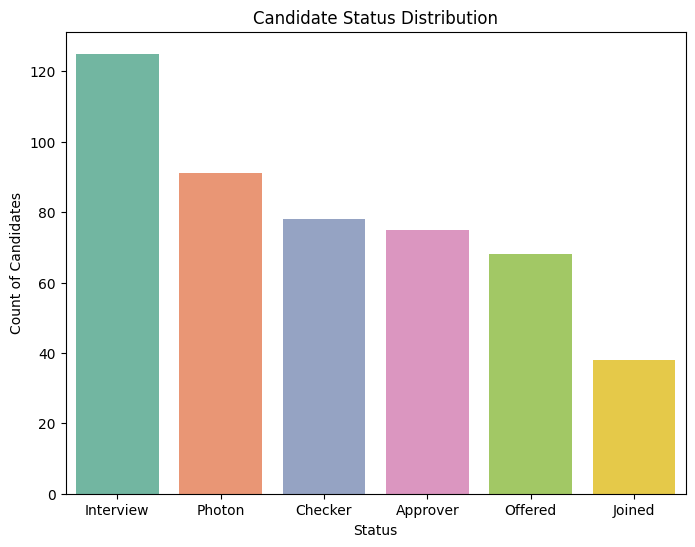

In [3]:
# Candidate Status Distribution
plt.figure(figsize=(8, 6))
status_counts = hr_data['Status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title('Candidate Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count of Candidates')
plt.show()

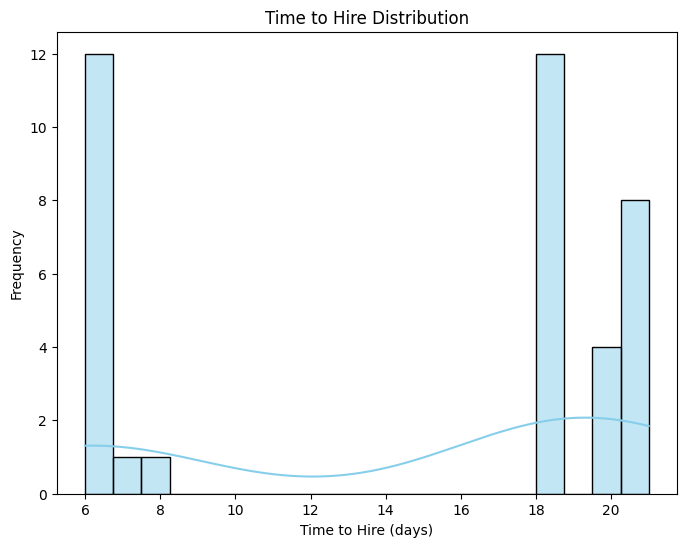

In [4]:
# Time to Hire Distribution
plt.figure(figsize=(8, 6))
sns.histplot(hr_data['Time to Hire'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Time to Hire Distribution')
plt.xlabel('Time to Hire (days)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

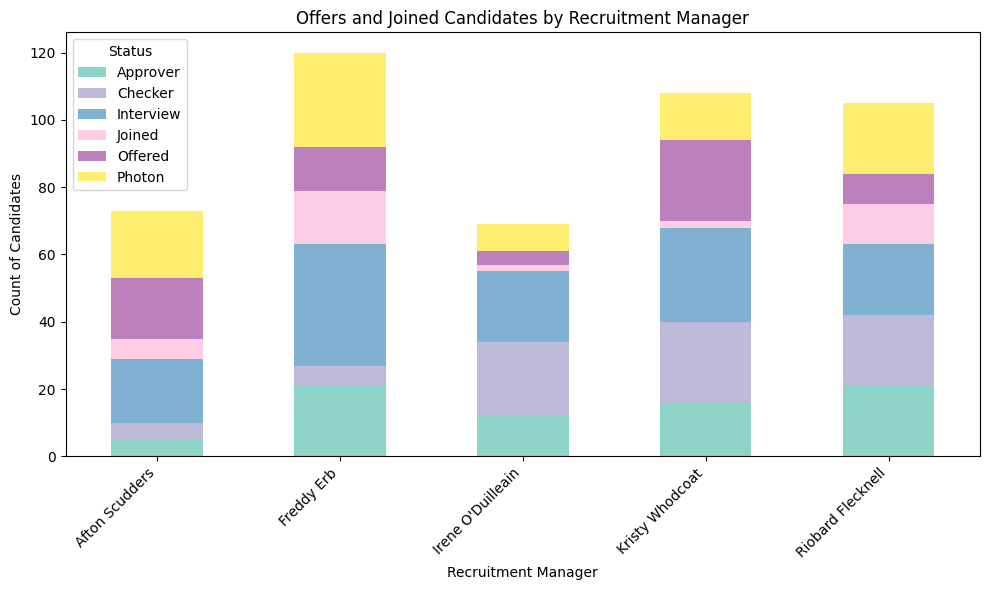

In [5]:
# Offers and Joined Candidates by Recruitment Manager
plt.figure(figsize=(10, 6))
manager_status = hr_data.groupby(['Recruitment Manager', 'Status']).size().unstack().fillna(0)
manager_status.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Offers and Joined Candidates by Recruitment Manager')
plt.xlabel('Recruitment Manager')
plt.ylabel('Count of Candidates')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

C:\Users\atul\AppData\Local\Temp\ipykernel_10820\2581237334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_by_group.index, y=avg_time_by_group.values, palette='viridis')


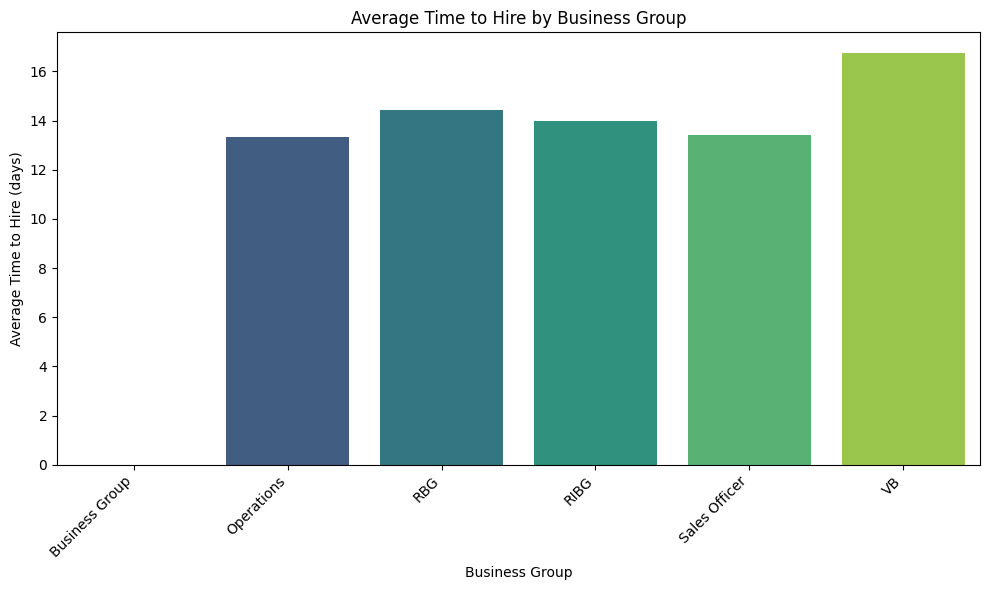

In [6]:
# Average Time to Hire by Business Group
plt.figure(figsize=(10, 6))
avg_time_by_group = hr_data.groupby('Business Group')['Time to Hire'].mean()
sns.barplot(x=avg_time_by_group.index, y=avg_time_by_group.values, palette='viridis')
plt.title('Average Time to Hire by Business Group')
plt.xlabel('Business Group')
plt.ylabel('Average Time to Hire (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

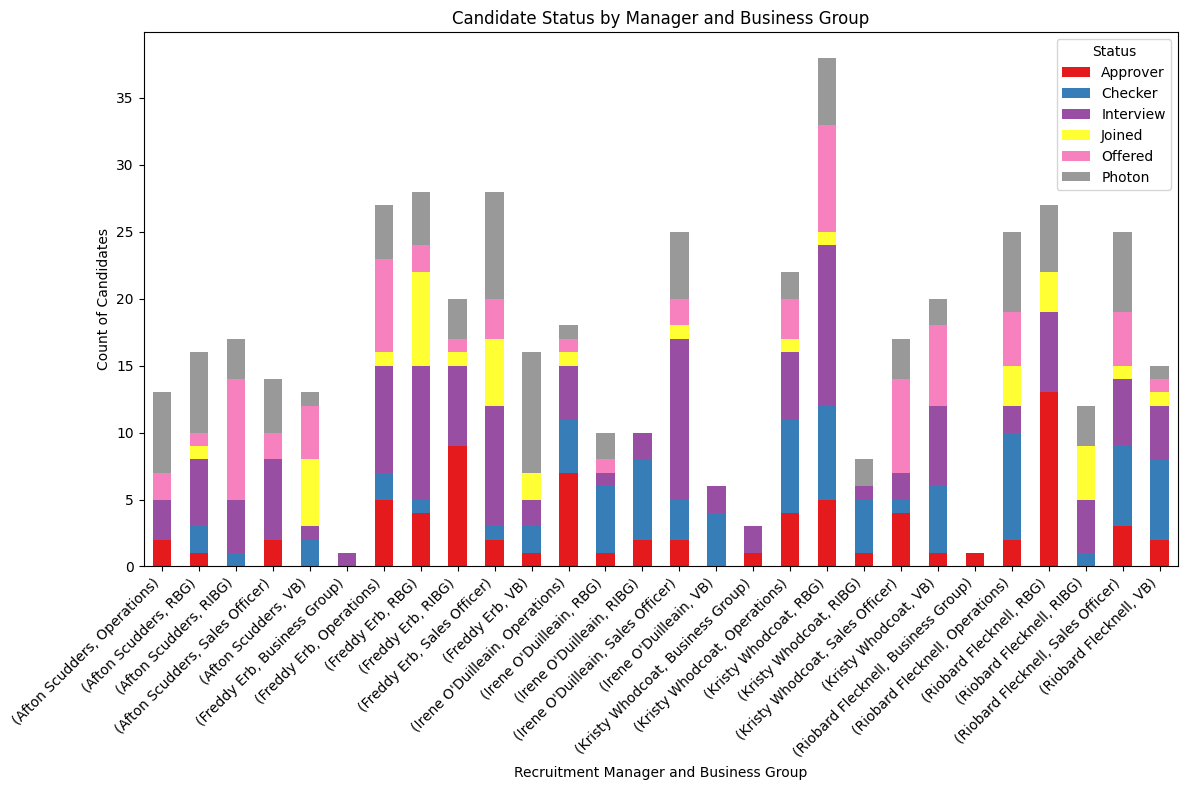

In [7]:
# Candidate Status by Manager and Business Group
plt.figure(figsize=(12, 8))
manager_business_status = hr_data.groupby(['Recruitment Manager', 'Business Group', 'Status']).size().unstack().fillna(0)
manager_business_status.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Candidate Status by Manager and Business Group')
plt.xlabel('Recruitment Manager and Business Group')
plt.ylabel('Count of Candidates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

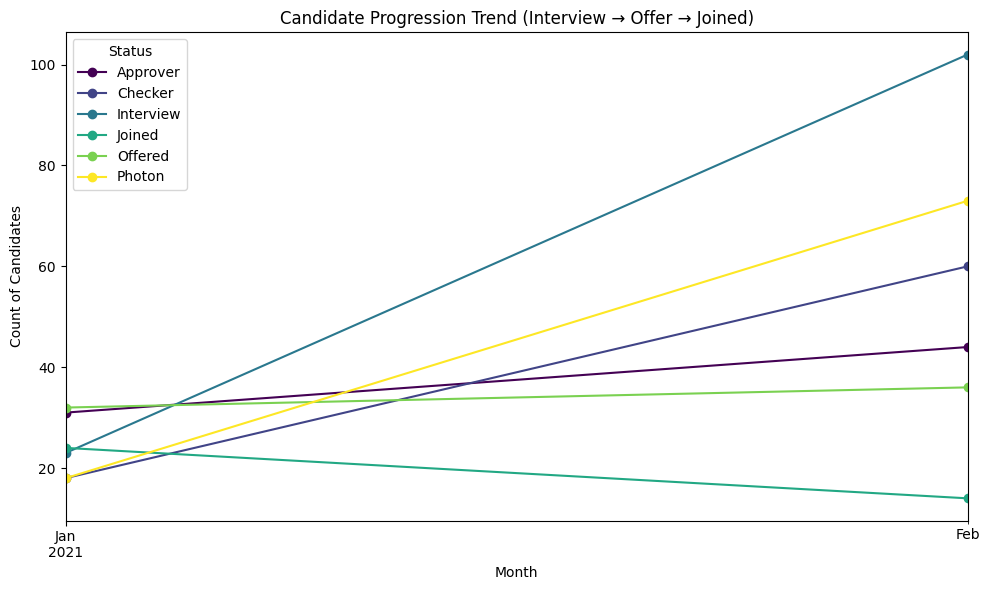

In [8]:
# Candidate Progression Trend (Interview → Offer → Joined) by Month
hr_data['Month'] = hr_data['Interview Date'].dt.to_period('M')

# Group data by Month and Status
progression_trend = hr_data.groupby(['Month', 'Status']).size().unstack().fillna(0)

# Plot the trend over months
progression_trend.plot(kind='line', figsize=(10, 6), marker='o', colormap='viridis')
plt.title('Candidate Progression Trend (Interview → Offer → Joined)')
plt.xlabel('Month')
plt.ylabel('Count of Candidates')
plt.legend(title='Status')
plt.tight_layout()
plt.show()